# Part I. Basic Processing and Engineering

## 1.1 Libraries
For this task, we will mainly use methods from NLTK. You can replace them with SpaCy.

In [1]:
%matplotlib inline
import pandas as pd
import nltk
import string
import numpy as np
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package 

## 1.2 Text example from the Daily Mirror

In [2]:
article = """
Brits are being warned to stay indoors as "ferocious" life-threatening 'day and night' temperatures are due to blast the UK for the first time in history.
Death-Valley type temperatures of 42C during the day and 30C at night are threatening to double the UK summer average - prompting a Met Office first-ever red warning.
The public are being urged "to do as little as possible" and try not to use public transport.
Hospitals have cancelled appointments and many businesses have announced two day closures including restaurants, bars, zoos and wildlife centres - while millions will work from home.
The chief executive of the College of Paramedics has warned that the "ferocious heat" the UK is predicted to experience over the next few days could result in people dying.
She told Sky: "We could see people who are vulnerable, young people, elderly people, people living with dementia who really do suffer.
"This is serious heat that could actually ultimately end in people's deaths because it is so ferocious. We are just not set up for that sort of heat in this country.
"This isn't like a lovely hot day where we can put a bit of sunscreen on, go out and enjoy a swim and a meal outside."
Recent figures revealed how one in ten people waited 10 hours for an ambulance and the average waiting times for a heart attack was more than 50 minutes.
"It's difficult not to call it a crisis but it has been a stealth crisis," she added.
Ministers are expected to hold a fourth Cobra meeting tomorrow after a national emergency was declared.
Outgoing PM Boris Johnson didn't attend the last meeting on Saturday and went to Chequers instead.
Labour's Angela Rayner blasted him for "partying while Britain boils" and described him as "grotesque".
He snubbed the meeting as one large water company supplying Essex warned "urgent action" was needed while others said they were monitoring the situation.
But despite universal pleas for the public to stay safe from health chiefs, not to travel and stay indoors, the Deputy Prime Minister Dominic Raab, decided to tell the public to "enjoy the sunshine" on Sky News.
His comments were blasted on social media with one saying: "Dominic Raab...brushing off the impending record breaking, earth burning temperatures and saying people should 'enjoy the sunshine'. Heaven help us all!"
Another added: "I vote to put @DominicRaab in an office with no air con during the heatwave so he can enjoy the summertime" and another said: "He should try enjoying it in a white suit, respirator mask and goggles while resuscitating someone's Nan."
BBC Weather presenter and meteorologist Simon King has pointed out that temperatures could reach 42°C in the East Midlands on Tuesday – tweeting that this level of heat "just shouldn't happen."
Affinity Water today said "urgent action" was needed in areas of Essex and Hertfordshire to conserve supplies, revealing demand had surged from 209 million gallons a day to 242 million gallons, due to the hot weather.
It added it was "working around the clock to maintain supplies". Some areas of Buckinghamshire, Surrey and North London are also affected.
Thames Water said they were monitoring the situation all the time but said if they did not see "around or above average rainfall" in the coming months it may result in water restrictions.
Two thousand people in east Kent were left with no water or low pressure over the weekend.
Southern Water said power issues on Friday evening caused a reservoir which serves the Broadstairs and St Peters areas to fail.
Wildfires have already started amid fears for the safety of firefighters with six hectare grass fires in Hayes and a fire at Warsash nature reserve in Hampshire destroying 15,000 square metres of heathland.
The rail network is about to go slow at a 20mph crawl, with some routes cancelled and gritters are out with sand to prevent the heat causing roads to "liquefy".
The boss of Transport for London has urged Londoners to undertake only necessary travel on Monday and Tuesday.
Andy Lord told LBC: "We're advising all our customers to only travel if their journey is essential, to make sure that they stay hydrated and carry water with them if they do have to travel.
"Check before they travel because journey times will be extended.
"We will have reduced services across the TFL network because of the safety restrictions we need to put in place due to the heat."
Avanti West Coast has urged passengers to travel only if it is "absolutely necessary" from Sunday until Tuesday.
"When the rail temperature gets above 50C, we have to reduce the speed to reduce the risk of damaging the track.
In extreme cases, the rails can buckle, we need to avoid that and maintain the safety of the railway," they said.
While London North Eastern Railway has urged people not to travel on Tuesday, warning that trains between London's King's Cross and the south of York and Leeds will not be running.
Greater Manchester Police (GMP) have repeated warnings about cooling off in open water after a 16-year-old died while swimming with friends in a canal in Salford Quays.
It is believed he was the fifth to die in the UK's waterways, with searches ongoing for a male at Ardsley Reservoir in West Yorkshire.
Met Office meteorologist, Steve Keates, warned the public to "do as little as possible" in the extreme heat.
"Part of the reason the warnings are out is because it's not just day time but night time temperatures that are a concern," he told The Mirror.
"When you are going to bed on Monday night it could still be 30C or more at bed time or later evening and still high 20s into the early hours. It's horrible basically."
He said hardest hit areas could be large urban areas such as London where the heat gets trapped in the city, taking longer to disperse.
But he said a "fascinating" aspect is that higher up in the atmosphere it will get hotter meaning mountains and hilltops will be unusually "quite a bit warmer".
"Even at night it could still be exceptionally hot for the time of day and at places where you wouldn't necessarily expect it to be," he said.
"Our advice is to do as little as possible in temperatures like this."
Scientist and climate specialist, John Grant, senior lecturer at Sheffield Hallam, warns that the heat could cause power cuts.
He said: "High temperatures on the road can damage the tarmac, liquify it.
"And the power stations require cooling and in extreme temperatures may reduce the water available or the water might not be cool enough to do the job.
"A few years ago some French nuclear power stations had to shut down because the rivers were too warm."
The 40C heat set to grip Britain shows climate change "really is a risk to health", the Deputy Chief Medical Officer warned.
England's DCMO Thomas Waite warned the "extreme heat" posed a threat to health and said: "The scientific and medical communities are nearly in unanimous agreement that climate change really is a risk to health and we need to take carbon reduction and adaptations seriously.
"The thing that means for events like this is that the risk of this extreme heat is going up so we all need to sort of think about the steps we can take during extreme weather for how we avoid getting ourselves into trouble in the first place."
NHS Confederation chairman Lord Adebowale said health staff "are pretty stretched at the moment".
He added: "Ambulances are operating at their peak, the waiting times for ambulances are now getting longer.
"We are going to be really, really pushed and it's not just the red warning, the heatwave - we are dealing with Covid, which is causing sickness in our ambulance crews."
"""

## 1.3 Tokenization
First, we split the raw text into sentences.

Second, we split sentences into words.

In [3]:
sentences = nltk.sent_tokenize(article)
print(sentences)
tokens = nltk.word_tokenize(sentences[0])
print(tokens)

['\nBrits are being warned to stay indoors as "ferocious" life-threatening \'day and night\' temperatures are due to blast the UK for the first time in history.', 'Death-Valley type temperatures of 42C during the day and 30C at night are threatening to double the UK summer average - prompting a Met Office first-ever red warning.', 'The public are being urged "to do as little as possible" and try not to use public transport.', 'Hospitals have cancelled appointments and many businesses have announced two day closures including restaurants, bars, zoos and wildlife centres - while millions will work from home.', 'The chief executive of the College of Paramedics has warned that the "ferocious heat" the UK is predicted to experience over the next few days could result in people dying.', 'She told Sky: "We could see people who are vulnerable, young people, elderly people, people living with dementia who really do suffer.', '"This is serious heat that could actually ultimately end in people\'s

## 1.4 Stopwords Removal

Stop words are words that add no meaning to a sentence. These are modal verbs, articles, pronouns, etc.
There are many lists of stop words. We will use the base one from NLTK.
The decision to remove stop words or not depends on the task.

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

print(stopwords)

stopwords_filtered = [w for w in tokens if not w.lower() in stopwords]
stopwords_and_punct_filtered = [w for w in stopwords_filtered if w.isalnum()] # here we also remove punctuation marks
print(tokens)
print(stopwords_filtered)
print(stopwords_and_punct_filtered)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## 1.5 Wordcloud
A wordcloud is a visual representation of words. Wordclouds are used to highlight popular words and phrases based on frequency. They provide you with quick and simple visual insights that can lead to deeper analysis.

Word size depends on frequency. The largest words are the most common.

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

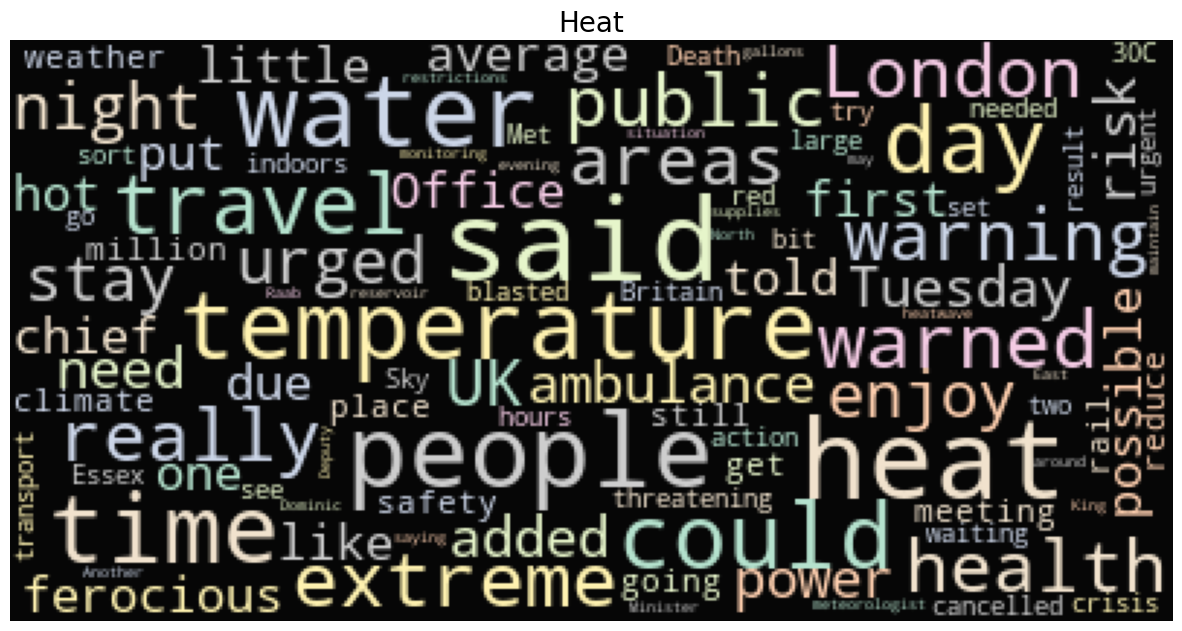

In [5]:
plt.figure(figsize=(15,10))
wc = WordCloud(background_color="black", max_words=100, stopwords=stopwords, max_font_size= 40)
wc.generate(article)
plt.title("Heat", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

## 1.6 Stemming

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.

In [6]:
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('extended')

for tok in stopwords_and_punct_filtered:
  print(stemmer.stem(tok))

brit
warn
stay
indoor
feroci
night
temperatur
due
blast
uk
first
time
histori


## 1.7 Lemmatization
Lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence.

In [7]:
lemmatizer = nltk.stem.WordNetLemmatizer()

for tok in stopwords_and_punct_filtered:
  print(lemmatizer.lemmatize(tok))

Brits
warned
stay
indoors
ferocious
night
temperature
due
blast
UK
first
time
history


## 1.8 POS Tagging
POS tagging marks a word in the text as corresponding to a particular part of speech based on its definition and context.

There are many different tagging systems. For this assignment, we will use the  [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) approach

In [8]:
tags = nltk.pos_tag(nltk.word_tokenize(sentences[0]))
tags

[('Brits', 'NNS'),
 ('are', 'VBP'),
 ('being', 'VBG'),
 ('warned', 'VBN'),
 ('to', 'TO'),
 ('stay', 'VB'),
 ('indoors', 'NNS'),
 ('as', 'IN'),
 ('``', '``'),
 ('ferocious', 'JJ'),
 ("''", "''"),
 ('life-threatening', 'JJ'),
 ("'day", 'NN'),
 ('and', 'CC'),
 ('night', 'NN'),
 ("'", "''"),
 ('temperatures', 'NNS'),
 ('are', 'VBP'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('blast', 'VB'),
 ('the', 'DT'),
 ('UK', 'NNP'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('in', 'IN'),
 ('history', 'NN'),
 ('.', '.')]

## 1.9 TDM, DGTM, Bag of Words

A **document-term matrix** is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. It is also common to encounter the transpose, or **term-document matrix** where documents are the columns and terms are the rows.

Terms are commonly single words separated by whitespace or punctuation on either side (a.k.a. unigrams). In such a case, this is also referred to as **bag of words** representation because the counts of individual words is retained, but not the order of the words in the document.



In [9]:
vectorizer = CountVectorizer(stop_words=stopwords)

DTM = pd.DataFrame(vectorizer.fit_transform(sentences).toarray(), columns=vectorizer.get_feature_names_out())
print(DTM.shape)
DTM.head()

(56, 493)


,000,10,15,16,209,20mph,20s,242,30c,40c,...,wildfires,wildlife,work,working,year,years,york,yorkshire,young,zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
TDM = DTM.T
print(TDM.shape)
TDM.head()

(493, 56)


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.10 N-Grams
An n-gram is a continuous sequence of n items from a given sample of text

In [11]:
unigrams = nltk.ngrams(stopwords_and_punct_filtered, 1)
[ ' '.join(grams) for grams in unigrams]

['Brits',
 'warned',
 'stay',
 'indoors',
 'ferocious',
 'night',
 'temperatures',
 'due',
 'blast',
 'UK',
 'first',
 'time',
 'history']

In [12]:
trigrams = nltk.ngrams(stopwords_and_punct_filtered, 3)
[ ' '.join(grams) for grams in trigrams]

['Brits warned stay',
 'warned stay indoors',
 'stay indoors ferocious',
 'indoors ferocious night',
 'ferocious night temperatures',
 'night temperatures due',
 'temperatures due blast',
 'due blast UK',
 'blast UK first',
 'UK first time',
 'first time history']

In [13]:
nltk.FreqDist(nltk.ngrams(stopwords_and_punct_filtered, 3)) # trigrams with frequencies; The counter can also be used instead of FreqDist.

FreqDist({('Brits', 'warned', 'stay'): 1, ('warned', 'stay', 'indoors'): 1, ('stay', 'indoors', 'ferocious'): 1, ('indoors', 'ferocious', 'night'): 1, ('ferocious', 'night', 'temperatures'): 1, ('night', 'temperatures', 'due'): 1, ('temperatures', 'due', 'blast'): 1, ('due', 'blast', 'UK'): 1, ('blast', 'UK', 'first'): 1, ('UK', 'first', 'time'): 1, ...})

## 1.11 TF-IDF
The tf–idf is the product of two statistics, term frequency and inverse document frequency.

Term frequency, tf(t,d), is the relative frequency of term t within document d,

Inverse document frequency is a measure of how much information the word provides, i.e., if it is common or rare across all documents.

In [14]:
tdidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
tdidf_vectorizer.fit_transform(sentences)

df = pd.DataFrame(tdidf_vectorizer.fit_transform(sentences).toarray(), columns=tdidf_vectorizer.get_feature_names_out())
print(df.shape)
df.head()

(56, 493)


,000,10,15,16,209,20mph,20s,242,30c,40c,...,wildfires,wildlife,work,working,year,years,york,yorkshire,young,zoos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225364,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.241764,0.241764,0.0,0.0,0.0,0.0,0.0,0.0,0.241764
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Part II. Practice

For this practice, we will use part of the author identification dataset from Kaggle.

We need only the **text** column.

People who like challenges can also try to solve a classification problem based on this. The original goal was to identify the author of sentences in the test set. The test set is not presented here, but you can split the data into train/validation/test and use any classification algorithm you know.


In [15]:
data = pd.read_csv('c:/Users/renas.alp/Downloads/train.csv')

In [16]:
data[:20]

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [17]:
corpus = data[data.author=="HPL"]["text"].values
hpl_string = ' '.join(corpus)

Your tasks:

Implement two functions that will split text into sentences and sentences into tokens

In [18]:
def tokenize_sentences(txt: str) -> list:

  return nltk.sent_tokenize(txt)

def tokenize_words(txt: str) -> list:

   return nltk.word_tokenize(txt)

In [19]:
sentences = tokenize_sentences(hpl_string)
words = tokenize_words(sentences[0])

try:
  assert words == ['It', 'never', 'once', 'occurred', 'to', 'me', 'that', 'the', 'fumbling', 'might', 'be', 'a', 'mere', 'mistake', '.']
  print('passed')
except AssertionError:
  print('failed')
  print(words)

passed


Implement two functions that will remove stop words and punctuation from the list of tokens

In [20]:
def remove_stopwords(words: list) -> list:
    stopwords = nltk.corpus.stopwords.words('english')
    words_cleaned = [w for w in words if w.lower() not in stopwords]
    return words_cleaned

def remove_punctuation(words: list) -> list:
    words_cleaned = [w for w in words if w.isalnum()] 
    return words_cleaned

In [21]:
words_wo_stopwords = remove_stopwords(words)
words_wo_punct = remove_punctuation(words_wo_stopwords)

try:
  assert words_wo_punct == ['never', 'occurred', 'fumbling', 'might', 'mere', 'mistake']
  print('passed')
except AssertionError:
  print('failed')
  print(words_wo_punct)


passed


Implement two functions for stemming and lemmatization
Цhat and when is best to use?

In [22]:
def words_stemming(words: list) -> list:
    stemmer = nltk.stem.PorterStemmer()
    word_stem = [stemmer.stem(w) for w in words] 
    return word_stem


def words_lemma(words: list) -> list:
    lemmatizer = nltk.stem.WordNetLemmatizer()
    word_lemma = [lemmatizer.lemmatize(w) for w in words] 
    return word_lemma   

In [23]:
word_stems = words_stemming(words_wo_punct)
word_lemmas = words_lemma(words_wo_punct)

try:
  assert word_stems == ['never', 'occur', 'fumbl', 'might', 'mere', 'mistak']
  assert word_lemmas == ['never', 'occurred', 'fumbling', 'might', 'mere', 'mistake']
  print('passed')
except AssertionError:
  print('failed')
  print(word_stems)
  print(word_lemmas)


passed


Implement a function that will return a wordcloud and a dictionary with the most common words and their frequencies.

<details>
<summary>hints:</summary>

Check the properties of the wordcloud object to see where the frequencies are stored.

</details>

In [30]:
def make_wordclouds(txt: str, word_count: int) -> tuple: # output should be like (wordcloud object, {'a': 0.5, 'b': 0.7, ...})
  wc = WordCloud(max_words=word_count)
  wc.generate(txt)
  freqs = dict(list(wc.words_.items())[:word_count])
  out = [] 
  out.append(wc)
  out.append(wc.words_)
  return out

In [31]:
top_5 = {'one': 1.0, 'thing': 0.9042056074766355, 'could': 0.8621495327102804, 'would': 0.8200934579439252, 'seemed': 0.6355140186915887}

try:
  assert make_wordclouds(hpl_string, 5)[1] == top_5
  plt.figure(figsize=(7,4))
  plt.imshow(make_wordclouds(hpl_string, 5)[0])
  plt.axis('off')
  print('passed')
except AssertionError:
  print('failed')
  print(make_wordclouds(hpl_string, 5))

failed
[<wordcloud.wordcloud.WordCloud object at 0x000002A46F106510>, {'one': 1.0, 'thing': 0.8666666666666667, 'now': 0.6430107526881721, 'seemed': 0.5849462365591398, 'time': 0.5741935483870968}]


Implement a function that will return the first N most frequently occurring verbs in a text.

First, use POS tagging to get only the verbs and then calculate the frequencies.

<details>
<summary>hints:</summary>

Read this page to understand which tags are verbs [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

</details>

In [32]:
def top_n_verbs(txt: str, n: int) -> list:
  from collections import Counter
  tokens = nltk.word_tokenize(txt)
  pos_tags = nltk.pos_tag(tokens)
  verb_tags = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
  verbs = [word for word, tag in pos_tags if tag in verb_tags]
  top_n = [word for word, count in Counter(verbs).most_common(n)] # PUT YOUR CODE HERE

  return top_n

In [33]:
top_7_verbs = ['was', 'had', 'were', 'be', 'have', 'been', 'is']
try:
  assert top_n_verbs(hpl_string, 7) == top_7_verbs
  print('passed')
except AssertionError:
  print('failed')
  print(top_n_verbs(hpl_string, 7))

passed


Implement a function that will return the first N most frequently occurring nouns in a text.

The same as in the previous case

In [34]:
def top_n_nouns(txt: str, n: int) -> list:
    from collections import Counter
    tokens = nltk.word_tokenize(txt)
    pos_tags = nltk.pos_tag(tokens)
    noun_tags = {'NN', 'NNS', 'NNP', 'NNPS'}
    nouns = [word for word, tag in pos_tags if tag in noun_tags] 
    top_n = [word for word, count in Counter(nouns).most_common(n)] 
    return top_n

In [35]:
top_7_nouns = ['man', 'night', 'time', 'things', 'men', 'thing', 'house']
try:
  assert top_n_nouns(hpl_string, 7) == top_7_nouns
  print('passed')
except AssertionError:
  print('failed')
  print(top_n_nouns(hpl_string, 7))

passed


Feature engineering example

Fill in all the empty rows using the first ones as examples.

In [36]:
stopwords = nltk.corpus.stopwords.words('english')
d = data.copy(deep=True)
d["tokens"] = d["text"].apply(lambda x: tokenize_words(x))
d["words"] = d["tokens"] .apply(lambda x: remove_punctuation(x))
d["clean tokens"] = d["words"].apply(lambda x: remove_stopwords(x))
d["lemmas"] = d["clean tokens"].apply(lambda x: words_lemma(x))
d["num tokens"] = d["tokens"].apply(len)
d["num chars"] = d["text"].apply(len)
d["num lemmas"] = d["lemmas"].apply(len)
d["num stopwords and punct"] = d["tokens"].apply(lambda x: len([w for w in x if not w.isalnum() or w.lower() in stopwords]))
d["num capitals"] = d["text"].apply(lambda x: sum(1 for c in x if c.isupper()))
d["avg word length"] = d["words"].apply(lambda x: np.mean([len(w) for w in x]) if len(x) > 0 else 0)

In [37]:
d.head()

,id,text,author,tokens,words,clean tokens,lemmas,num tokens,num chars,num lemmas,num stopwords and punct,num capitals,avg word length
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[This, process, however, afforded, me, no, mea...","[process, however, afforded, means, ascertaini...","[process, however, afforded, mean, ascertainin...",48,231,21,27,3,4.487805
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[It, never, once, occurred, to, me, that, the,...","[never, occurred, fumbling, might, mere, mistake]","[never, occurred, fumbling, might, mere, mistake]",15,71,6,9,1,4.071429
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[In, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, capered, hill, ...","[left, hand, gold, snuff, box, capered, hill, ...",41,200,19,22,1,4.444444
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[How, lovely, is, spring, As, we, looked, from...","[lovely, spring, looked, Windsor, Terrace, six...","[lovely, spring, looked, Windsor, Terrace, six...",38,206,21,17,4,4.970588
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[Finding, nothing, else, not, even, gold, the,...","[Finding, nothing, else, even, gold, Superinte...","[Finding, nothing, else, even, gold, Superinte...",31,174,16,15,2,5.333333


From that moment you can use this table as a template for a classification.

Feel free to add another features like NER count, verbs/nouns/adjectives/... count, feminine/masculine pronouns count, etc.

In [38]:
d.dropna(inplace=True)
X = d[[
    'num tokens',
    'num chars',
    'num lemmas',
    'num stopwords and punct',
    'num capitals',
    'avg word length'
    ]]

# Label encode authors
le = LabelEncoder()
d['author_encoded'] = le.fit_transform(d['author'])

y = d['author_encoded']

# y = d["author"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

params = {
    'objective': 'multi:softmax',
    'max_depth': 5,
    'eta': 0.1,
    'n_estimators': 100,
    'num_class': 3
    }         
           
xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4843377596186585

An alternative solution using the Bag of Words model

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('author', axis=1), data['author'], train_size=0.7, random_state=0)

In [42]:
bow = CountVectorizer()
bow.fit(data['text'])
X_train_bow = bow.transform(X_train['text'])

In [43]:
nb_bow = MultinomialNB(alpha=1.0)
nb_bow.fit(X_train_bow, y_train)
y_pred = nb_bow.predict(X_train_bow)
accuracy_score(y_train, y_pred) # training set accuracy

0.9176213060926669

In [44]:
X_test_bow = bow.transform(X_test['text'])
y_pred_bow = nb_bow.predict(X_test_bow)
accuracy_score(y_test, y_pred_bow) # test set accuracy

0.8372488934286687

Reproduce the same with Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_bow, y_train)
y_pred_logreg = logreg.predict(X_test_bow)
print('Test set accuracy:', accuracy_score(y_test, y_pred_logreg))

Test set accuracy: 0.8110316649642493
